In [2]:
import math as mth
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random        

In [3]:
#Zone di interesse (rappresentazione grafica)

S=[0,1]  
I=[1,2]

#Zone di transizione, recupero, fatalità

P_SI=0.2 #Percentuale da suscettibili a infetti
s=0.2
S0=[s,s+P_SI*(S[-1]-S[0])]

P_IR=0.4  #Percentuale da infetti a guariti
s=1.5
R=[s,s+P_IR*(I[-1]-I[0])]

P_IF=0.1 #Percentuale da infetti a deceduti
s=1.4
F=[s,s+P_IF*(I[-1]-I[0])]


In [4]:
#Definiamo una funzione di traiettoria

def Traiettoria(x,y,f,r,N,t=0):

 #Questa variabile differenzia se un soggetto è suscettibile o infetto  
    
  z=[x+y]             
                                 
 #z=x+y=[0,1]+0, Suscettibili   
 #z=x+y=[0,1]+1, Infetti
    
  i=0
  while i<N:   #Il ciclo continua fino a N numero massimo di iterazioni, controllo cosi se ci sono transizioni tra le zone

    i+=1
    z.append(act(z[-1],f,t))      #Se il tempo t è nullo non c'è immunità, se non è nullo c'è immunita della durata di t (tempo equivale a numero di iterazioni)

 #La x rimane uguale a quando entrato in una delle zone di guarigione o morte

    if z[-1]==0:                        #Se z è uguale a 0 mi trovo nella zona di immunità della durata di t iterazioni
      i+=t                              #Salto t iterazioni, aggiungendo t-1 stati di immunita a quello gia presente                  
      z.extend([0]*(t-1))               #Questo extend aumenta la lunghezza dell'arrey di immunità di t-1
      z.append(z[-(t+1)]-1)             #Lo riporto alla x uguale alla zona di guarigione, sottraendo 1 alla y per riportarlo nei suscettibili
    elif z[-1]>=2:                      #Una volta deceduto, lo stato non cambia e termina il ciclo
      i=N

  return z

In [5]:
#Funzione problema 1
def f1(x,r):
  if x<=r:
    f_x=x/r
  else:
    f_x=1-(1-x)/(1-r)
  return f_x


#Funzione Pomeau-Manneville problema 3
def f3(x,r):
  q=2
  C=(1-r)/r**q
  if x<=r:
    f_x=x+C*(x**q)
  else:
    f_x=1-(1-x)/(1-r)
  return f_x

In [6]:
def act(z,f,flag=0):                      #Flag agisce da attivatore 
    y=int(z)                              #Restano invariati se non rispettano i parametri degli if
    x=f(z-y,r)

    s0,rec,fat=1,0,0                      #Senza flag (flag=0) , s0 manda y=1, rec e far mandano in zona di suscettibilità, la x resta invariata in ogni caso
    if flag:                              #Se opero come richiesto dal problema due, rec e fat mi mandano in zona immunità o in zona di fatalità ,
                                          #Si attiva per ogni valore di flag diverso da 0
      fat=np.random.choice([0,2],p=[0.3,0.7])
      if R[0]<z<R[1]:                     #Se si trova nella zona di guarigione manda in immunità per t iterazioni
        return 0

    if S0[0]<=z<=S0[1]:                   #Se si trova nella zona di contagio manda in infetto
      y=s0
    elif y==1 and x==0:                   #Se y=1, x=0 sono in un punto di fisso e il sistema lo rimanda in S
      y=0
    elif R[0]<=z<=R[1]:                   #Se si trova nella zona di guarigione manda in suscettibilita se il flag non è attivo, altrimenti in immunità se attivo
      y=rec
    elif F[0]<z<=F[1]:                    #Se si trova in zona di decesso manda in suscettibilità un "nuovo individuo" se il flag non è attivo, altrimenti il soggetto muore e terminano le iterazioni
      y=fat

    return x+y                            #Restituisce z finche non finiscono le iterazioni


In [7]:
def ynorm(y, ymin=-0.3, ymax=2.1):
    """Normalizza un valore y nell'intervallo [ymin, ymax] in [0,1]."""
    return (y - ymin) / (ymax - ymin)

def Plot(υ, r, N, S0, R, F, 
         ymin=-0.3, ymax=2.1, 
         save_path="Graf1.png"):
    
    plt.figure(figsize=(12, 6))
    plt.ylim(ymin, ymax)
    lim = [-1, len(υ)+5]
    plt.xlim(lim)

    # Sfondo grigio chiaro
    ax = plt.gca()
    ax.set_facecolor("#f7f7f7")

    # traiettoria
    x, y = np.arange(len(υ)), υ
    plt.plot(x, y, 'o-', color='dimgray', ms=3, lw=0.3, alpha=0.8, label="Traiettoria dinamica")

    # parametri grafici
    spess = 1.2
    displ = -3
    χ = lim[0] + 0.1

    # RIP (nero)
    plt.axvline(x=χ, ymin=ynorm(2, ymin, ymax), ymax=ynorm(3, ymin, ymax), color="black", lw=spess)
    plt.axhline(y=2, color='black', linestyle="--")
    plt.text(lim[0]+displ, 2.1, "RIP", color="black", va="center", rotation=90, fontsize=15, fontweight="bold")

    # S0 e I0 (rosso)
    plt.axvline(x=χ, ymin=ynorm(0, ymin, ymax), ymax=ynorm(2, ymin, ymax), color="firebrick", lw=spess)
    plt.axhline(y=S0[0], color='firebrick', linestyle=":")
    plt.axhline(y=S0[1], color='firebrick', linestyle=":")
    plt.text(lim[0]+displ, np.mean(S0), "S0", color="firebrick", va="center", rotation=90, fontsize=15)
    plt.text(lim[0]+displ, np.mean([1, min(F[0], R[0])]), "I0", color="firebrick", va="center", rotation=90, fontsize=15)

    # R (blu)
    plt.axvline(x=χ, ymin=ynorm(R[0], ymin, ymax), ymax=ynorm(R[1], ymin, ymax), color="royalblue", lw=spess)
    plt.axhline(y=R[0], color='royalblue', linestyle=":")
    plt.axhline(y=R[1], color='royalblue', linestyle=":")
    plt.text(lim[0]+displ, np.mean(R), "R", color="royalblue", va="center", rotation=90, fontsize=15)

    # S1 (verde)
    plt.axvline(x=χ, ymin=ynorm(0, ymin, ymax), ymax=ynorm(S0[0], ymin, ymax), color="seagreen", lw=spess)
    plt.axvline(x=χ, ymin=ynorm(S0[1], ymin, ymax), ymax=ynorm(1, ymin, ymax), color="seagreen", lw=spess)
    plt.text(lim[0]+displ, S0[0]/2, "S1", color="seagreen", va="center", rotation=90, fontsize=15)
    plt.text(lim[0]+displ, (S0[1]+1)/2, "S1", color="seagreen", va="center", rotation=90, fontsize=15)

    # F (viola)
    plt.axvline(x=χ, ymin=ynorm(F[0], ymin, ymax), ymax=ynorm(F[1], ymin, ymax), color="purple", lw=spess)
    plt.axhline(y=F[0], color='purple', linestyle=":")
    plt.axhline(y=F[1], color='purple', linestyle=":")
    plt.text(lim[0]+displ, np.mean(F), "F", color="purple", va="center", rotation=90, fontsize=15)

    # IMM (oro)
    plt.plot(lim[0], 0, 'o', color='goldenrod', ms=6)
    plt.axhline(y=0, color='goldenrod', linestyle="--")
    plt.text(lim[0]+displ, -0.1, "IMM", color="goldenrod", va="center", rotation=90, fontsize=15, fontweight="bold")

    # linea stabilità (grigia tratteggiata)
    plt.axhline(y=1, color='gray', linestyle="--", lw=1)

    # Griglia trasparente
    plt.grid(True, which="both", ls="--", lw=0.5, alpha=0.5)

    # Titoli e assi
    plt.title(f"Traiettoria epidemiologica (z0={υ[0]:.4f}, r={r}, iterazioni={min(len(υ),N)})", fontsize=13, fontweight="bold")
    plt.xlabel(f"Passi n  |  S0=[{S0[0]},{S0[-1]}]  R=[{R[0]},{R[-1]}]  F=[{F[0]},{F[-1]}]", fontsize=15)
    plt.ylabel("z", fontsize=11)
    plt.yticks([])

    # Legenda
    plt.legend(loc="upper right", frameon=True, facecolor="white", edgecolor="gray")

    plt.tight_layout()
    plt.savefig(save_path, dpi=200, bbox_inches="tight")
    plt.show()


In [28]:
    #Genero la traiettoria
    x0,y0,r,N=np.random.uniform(),0,0.3,1000
    z=Traiettoria(x0,y0,f1,r,N,t=5)
    z1=Traiettoria(x0,y0,f3,r,N,t=5)
    z0=Traiettoria(x0,y0,f3,r,200,t=0)


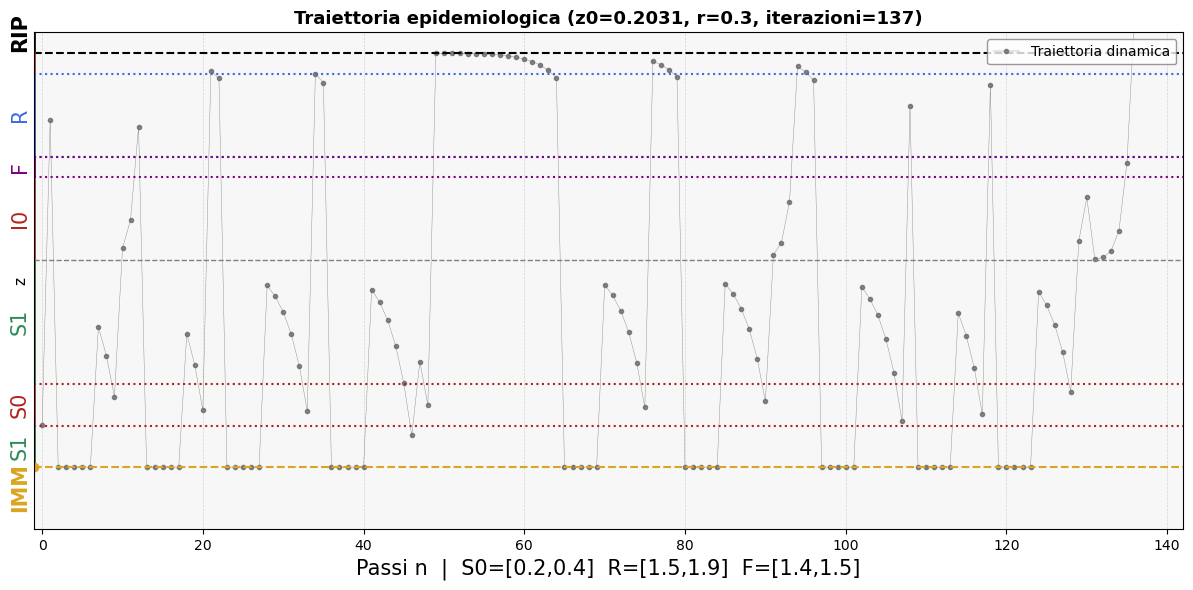

[0.2030675743468996, 1.6768919144896652, 0, 0, 0, 0, 0, 0.6768919144896652, 0.5384170206995218, 0.34059574385645963, 1.0579939197949422, 1.1933130659831406, 1.6443768866104687, 0, 0, 0, 0, 0, 0.6443768866104687, 0.491966980872098, 0.2742385441029971, 1.9141284803433236, 1.8773264004904622, 0, 0, 0, 0, 0, 0.8773264004904622, 0.8247520007006602, 0.7496457152866575, 0.6423510218380821, 0.4890728883401173, 0.27010412620016755, 1.900347087333892, 1.857638696191274, 0, 0, 0, 0, 0, 0.8576386961912741, 0.7966267088446772, 0.7094667269209675, 0.5849524670299535, 0.40707495289993356, 0.15296421842847652, 0.5098807280949218, 0.299829611564174, 1.9994320385472466, 1.9991886264960665, 1.9988408949943808, 1.9983441357062581, 1.9976344795803689, 1.9966206851148127, 1.9951724073068753, 1.993103439009822, 1.9901477700140313, 1.9859253857343304, 1.9798934081919006, 1.9712762974170008, 1.958966139167144, 1.9413801988102057, 1.9162574268717225, 1.8803677526738893, 0, 0, 0, 0, 0, 0.8803677526738893, 0.8290

In [9]:
Plot(z,r,N,S0,R,F,ymin=-0.3, ymax=2.1, save_path="Mappa1")
print(z)

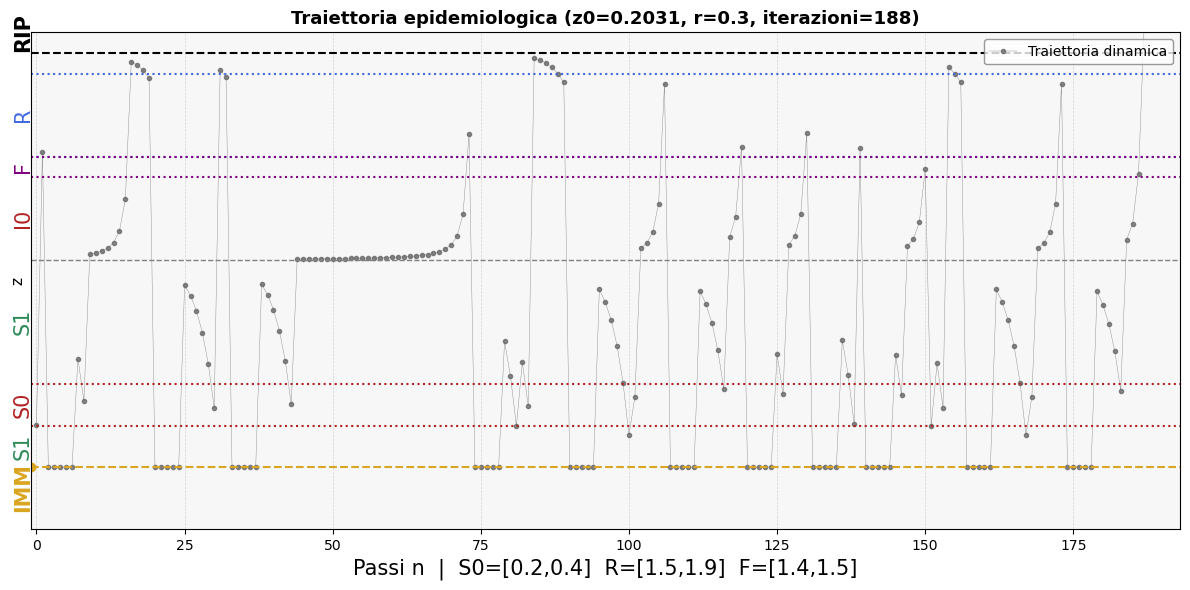

[0.2030675743468996, 1.5237954390779387, 0, 0, 0, 0, 0, 0.5237954390779387, 0.3197077701113409, 1.0281539573019156, 1.0343189763933673, 1.0434795819320557, 1.0581832689486161, 1.084513323947315, 1.140066116694389, 1.2926545826065263, 1.9587956193223053, 1.9411365990318648, 1.915909427188378, 1.8798706102691116, 0, 0, 0, 0, 0, 0.8798706102691116, 0.8283865860987308, 0.7548379801410441, 0.6497685430586344, 0.4996693472266206, 0.28524192460945796, 1.91806491225874, 1.882949874655343, 0, 0, 0, 0, 0, 0.882949874655343, 0.8327855352219186, 0.7611221931741694, 0.6587459902488134, 0.5124942717840191, 0.30356324540574153, 1.0050903505796307, 1.0052918857831472, 1.0055096951009173, 1.0057458030795123, 1.0060025806030677, 1.0062828215111501, 1.0065898403144689, 1.006927598056237, 1.007300866171572, 1.0077154423137793, 1.0081784382589802, 1.00869866933286, 1.0092871892630122, 1.0099580372528445, 1.0107293011878482, 1.0116246626632448, 1.0126756954123999, 1.013925376278306, 1.0154336126465804, 1.01

In [10]:
Plot(z1,r,N,S0,R,F,ymin=-0.3, ymax=2.1,save_path="Mappa3")
print(z1)

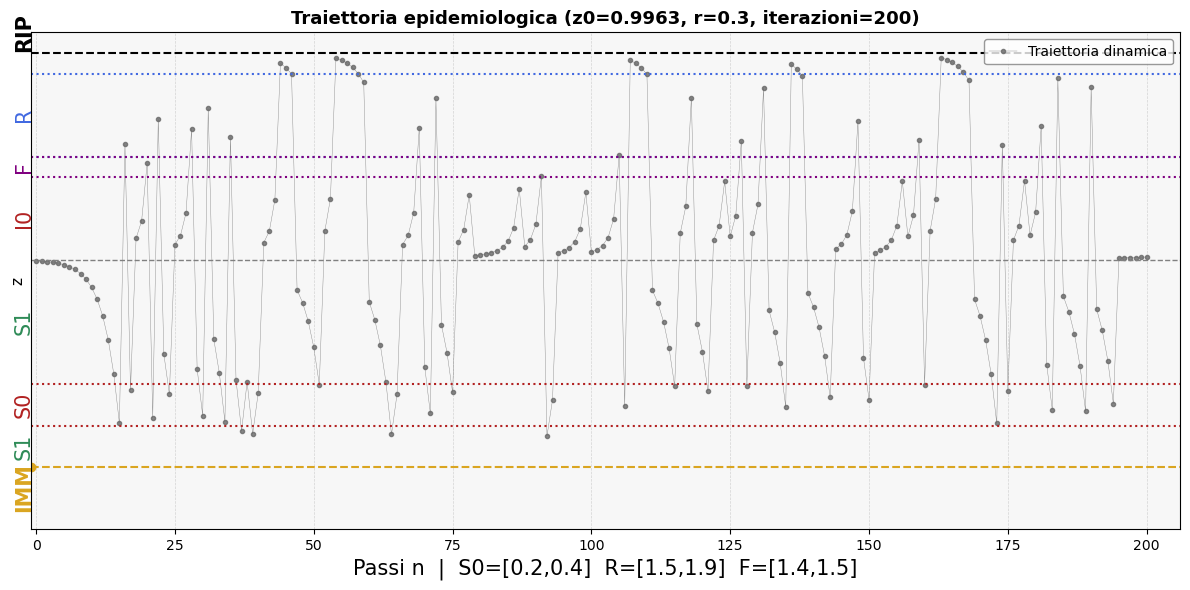

[0.9962584547406823, 0.9946549353438319, 0.9923641933483313, 0.9890917047833304, 0.9844167211190434, 0.9777381730272049, 0.9681973900388642, 0.9545677000555203, 0.935096714365029, 0.9072810205214699, 0.8675443150306712, 0.8107775929009589, 0.7296822755727983, 0.6138318222468546, 0.4483311746383637, 0.2119016780548052, 1.5611419537626898, 0.3730599339466997, 1.104371334209571, 1.1890975873571281, 1.4672145682571358, 0.23887795465305106, 1.6826987774692463, 0.5467125392417804, 0.35244648463111483, 1.0749235494730212, 1.1185844026501919, 1.227957540276103, 1.6321269638106781, 0.4744670911581116, 0.24923870165444506, 1.7323937158952831, 0.617705308421833, 0.45386472631690433, 0.21980675188129184, 1.5955901487793214, 0.42227164111331617, 0.1746737730190231, 0.4119809828689213, 0.1599728326698876, 0.35901633305543756, 1.0843090472220536, 1.139593611782535, 1.2911543175085922, 1.9504830466499912, 1.929261495214273, 1.8989449931632472, 0.8556357045189245, 0.7937652921698921, 0.7053789888141315

In [30]:
Plot(z0,r,200,S0,R,F,ymin=-0.3, ymax=2.1,save_path="Mappa2")
print(z0)